In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
import sys
from PIL import Image
sys.modules['Image'] = Image

# MODEL CREATION

In [4]:
classifier=Sequential()

classifier.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

classifier.add(MaxPooling2D(pool_size=2))

classifier.add(Convolution2D(32,(3,3),activation="relu"))
classifier.add(MaxPooling2D(pool_size=2))

classifier.add(Flatten())

classifier.add(Dense(units=128,activation="relu"))
classifier.add(Dense(units=1,activation="sigmoid"))


classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# DATA PROCESSING

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [7]:

training_set = train_datagen.flow_from_directory(r'D:\Projects\COVID-19\face-mask-detector\dataset\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1376 images belonging to 2 classes.


In [40]:
test_set = test_datagen.flow_from_directory(r'D:\Course Notes\Machine Learning A-Z\P14-Part8-Deep-Learning\Section 36 - Convolutional Neural Networks (CNN)\Python\dog vs cat\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [8]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 80,
                         epochs = 10)

Epoch 1/10
80/80 [==============================] - 29s 363ms/step - loss: 0.4237 - accuracy: 0.8078
Epoch 2/10
80/80 [==============================] - 12s 148ms/step - loss: 0.1016 - accuracy: 0.9637
Epoch 3/10
80/80 [==============================] - 12s 153ms/step - loss: 0.0742 - accuracy: 0.9762
Epoch 4/10
80/80 [==============================] - 13s 159ms/step - loss: 0.0564 - accuracy: 0.9816
Epoch 5/10
80/80 [==============================] - 13s 164ms/step - loss: 0.0407 - accuracy: 0.9891
Epoch 6/10
80/80 [==============================] - 14s 174ms/step - loss: 0.0344 - accuracy: 0.9887
Epoch 7/10
80/80 [==============================] - 15s 186ms/step - loss: 0.0326 - accuracy: 0.9906
Epoch 8/10
80/80 [==============================] - 14s 179ms/step - loss: 0.0433 - accuracy: 0.9840
Epoch 9/10
80/80 [==============================] - 14s 179ms/step - loss: 0.0208 - accuracy: 0.9934
Epoch 10/10
80/80 [==============================] - 14s 180ms/step - loss: 0.0328 - accura

# PREDICTIONS

In [9]:
import numpy as np
from keras.preprocessing import image

In [23]:
# img_pred = image.load_img(r'D:\Projects\COVID-19\face-mask-detector\examples\example_06.png', target_size = (64, 64))
# img_pred = image.img_to_array(img_pred)
# img_pred = np.expand_dims(img_pred, axis = 0)
# rslt = classifier.predict(img_pred)

# ind = training_set.class_indices

# if rslt[0][0] == 1:
#     prediction = "no mask"
# else:
#     prediction = "mask"

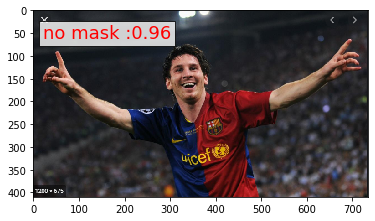

In [10]:

import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img1 = image.load_img(r'D:\Projects\COVID-19\facemasks\vv4.png', target_size=(64, 64))
img2 = image.load_img(r'D:\Projects\COVID-19\facemasks\vv4.png')
img = image.img_to_array(img1)
img = img/255

img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='no mask :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='mask :%1.2f'%(1.0-prediction[0,0])
    plt.text(20,62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img2)
plt.show()

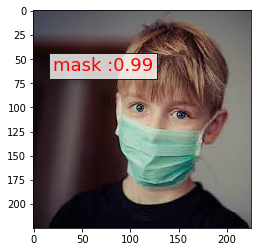

In [11]:

import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img1 = image.load_img(r'D:\Projects\COVID-19\facemasks\download (2).jpg', target_size=(64, 64))
img2 = image.load_img(r'D:\Projects\COVID-19\facemasks\download (2).jpg')
img = image.img_to_array(img1)
img = img/255

img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='no mask :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='mask :%1.2f'%(1.0-prediction[0,0])
    plt.text(20,62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img2)
plt.show()